In [1]:
from datetime import datetime

import pandas as pd

from FACTOID.get_subreddits import most_active_subreddits

In [2]:
df=pd.read_csv('reddit_dataset.csv')

In [10]:
node_data = df[['user_id', 'fake_news_spreader']]

In [11]:
node_data

,user_id,fake_news_spreader
0,ddf62a134f09db7a6056190d594bd41ff2f4cf04faf5db...,0
1,a78d753b103a2a4310ad6d1d49723733a6e4744bbf1beb...,0
2,19a734ee97b484a1a6c9625a1a3a0b5ddbabde3679ee2c...,0
3,d57699be1824c59714fb9a799b7b5b670227b07e2bde00...,0
4,26d0132074c91843483fb0f8b0378083f876d748be172b...,1
...,...,...
4145,e404255fd2be1d1e3c50c80f3ab21ec1be465c15d89541...,0
4146,e68fe2165fb6db674ae03dca13f1d14830d2a44853ebb2...,0
4147,cee6bf50d84a8287e957feed646da5aae981c53076acd9...,0
4148,95157a1c2c81dffdfacd4cfeb9fb62d82b6be831852ad3...,0


In [12]:
user_ids = node_data['user_id'].tolist()

In [13]:
user_to_idx = {user_id: idx for idx, user_id in enumerate(user_ids)}

In [14]:
user_to_idx

{'ddf62a134f09db7a6056190d594bd41ff2f4cf04faf5db32406bbec473f46935': 0,
 'a78d753b103a2a4310ad6d1d49723733a6e4744bbf1beb4d0e484a48fcf73870': 1,
 '19a734ee97b484a1a6c9625a1a3a0b5ddbabde3679ee2c8e25e85dc6017bff59': 2,
 'd57699be1824c59714fb9a799b7b5b670227b07e2bde0064536151f6cf8fd9fd': 3,
 '26d0132074c91843483fb0f8b0378083f876d748be172b7f8982511d36771efe': 4,
 '9905cf47617f7c6a4c38ffa57f5bae048b94fec61a339ce3e07bdbd53db74352': 5,
 '096846064c66c7a73d5cc7a7341d2ffa637d2e86e21b145df470017b0d4ceec0': 6,
 '67ffb77c37ab42f6c413c96155838369325075d672f2e687fb5bd1f07010c2ca': 7,
 'ddd77aebb4eb4cac21edc339e54c6618493a0cf64310c8faa9df0c178b0161ea': 8,
 '1edaed6330d2c832ebeaed54362ee1c22bf0c44bd2a85f6b420ba648a0f62366': 9,
 '010b78ac1ec4284102c6244f2eb932530419ed020017535334c90c15f99e8bc7': 10,
 '0c2eea434fdde4bd88ded090dca13a9fd343535718fc3ca0fcfb3b1f0ea10b5a': 11,
 '04c2e73f157c82f805c8a398f45bf43eaa6a86b52b34e93e7b208d5087256781': 12,
 'f9bacd85103c1b75ac76d44964ecf32214cb33f89886490cd56c37bc28a

In [15]:
edges = []

In [29]:
folder_path ='social_graph_data'

In [30]:
import os

In [31]:
for filename in os.listdir(folder_path):
    if filename.endswith('.txt'):
        with open(os.path.join(folder_path, filename), 'r') as file:
            for line in file:
                parts = line.strip().split(';')
                user_id = parts[0]
                replied_user = parts[3]

                if user_id in user_to_idx and replied_user in user_to_idx:
                    edges.append((user_to_idx[user_id], user_to_idx[replied_user]))

In [33]:
import torch

In [34]:
edge_index = torch.tensor(edges, dtype=torch.long).t().contiguous()

In [35]:
from torch_geometric.data import Data

In [36]:
x = torch.ones((len(user_ids), 1), dtype=torch.float)

y = torch.tensor(node_data['fake_news_spreader'].values, dtype=torch.long)

In [37]:
data = Data(x=x, edge_index=edge_index, y=y)

In [38]:
torch.save(data, 'graph_data.pt')

In [39]:
data

Data(x=[4150, 1], edge_index=[2, 2270905], y=[4150])

In [5]:
df[["documents","user_id"]]

,documents,user_id
0,"[('gloapg3', ""The fact that this has to be exp...",ddf62a134f09db7a6056190d594bd41ff2f4cf04faf5db...
1,"[('fyfpnj4', 'Shelby County vs Holder. One of ...",a78d753b103a2a4310ad6d1d49723733a6e4744bbf1beb...
2,"[('gmpzs0h', ""I've heard audio of him saying h...",19a734ee97b484a1a6c9625a1a3a0b5ddbabde3679ee2c...
3,"[('gghar1g', ""No. The democrats and with as ma...",d57699be1824c59714fb9a799b7b5b670227b07e2bde00...
4,"[('fyropxg', 'So, two weeks at Club Fed and 5 ...",26d0132074c91843483fb0f8b0378083f876d748be172b...
...,...,...
4145,"[('fz673tq', 'Somebody literally said that to ...",e404255fd2be1d1e3c50c80f3ab21ec1be465c15d89541...
4146,"[('gkezeid', 'Please dont insult sex workers. ...",e68fe2165fb6db674ae03dca13f1d14830d2a44853ebb2...
4147,"[('fvlkgw8', '7,000 max. Womp womp.', datetime...",cee6bf50d84a8287e957feed646da5aae981c53076acd9...
4148,"[('fztr5v7', 'Just imagine how tired Cucker Ta...",95157a1c2c81dffdfacd4cfeb9fb62d82b6be831852ad3...


In [21]:
subreddit_df=pd.read_csv('subreddit_dataset.csv')
most_active_subreddits=pd.read_csv('most_active_subreddits.csv')

In [19]:
subreddit_df.head()

,user_id,subreddit,post_count,total_posts,percentage
0,ddf62a134f09db7a6056190d594bd41ff2f4cf04faf5db...,r/politics,311,317,98.107256
1,ddf62a134f09db7a6056190d594bd41ff2f4cf04faf5db...,r/JoeBiden,2,317,0.630915
2,ddf62a134f09db7a6056190d594bd41ff2f4cf04faf5db...,r/CoronavirusUS,4,317,1.261830
3,a78d753b103a2a4310ad6d1d49723733a6e4744bbf1beb...,r/politics,392,392,100.000000
4,19a734ee97b484a1a6c9625a1a3a0b5ddbabde3679ee2c...,r/politics,3227,3266,98.805879


In [26]:
most_active_subreddits[most_active_subreddits["percentage"]]

,user_id,subreddit,percentage
0,0003fafe378856de02194efe58a6c078dc1e6ddd9efb20...,r/politics,87.640449
1,000bcb5df7671b9cb7937c736d2f66d497de3ca3563ec7...,r/Conservative,97.389474
2,000fc015bdba09569fc127b9750a670ccbf17167c38a92...,r/politics,100.000000
3,001f7fbf5fa8504bccacb2cbf654a6b40b62ce35730409...,r/politics,85.789474
4,002ee190725837df6104a29b8370401e57b64c266a0d5c...,r/politics,96.967655
...,...,...,...
4144,ffaf7d9cd2772130d1b0dd0833f327fc0a64ebc0bcab03...,r/politics,99.126638
4145,ffb4297eefd0161a85ebe32cda3e5d61148497629df4e7...,r/politics,100.000000
4146,ffd6820592d6595c628ce9c748d8e5de728ea2397ec8d5...,r/Conservative,100.000000
4147,ffd8c54ae6a30b53c389b206cece0b8ec29a810ed6f60f...,r/politics,89.516129


In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

In [28]:
most_active_subreddits = most_active_subreddits.sort_values(by='percentage', ascending=False)

C:\Users\petar\AppData\Local\Temp\ipykernel_22756\1935291511.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


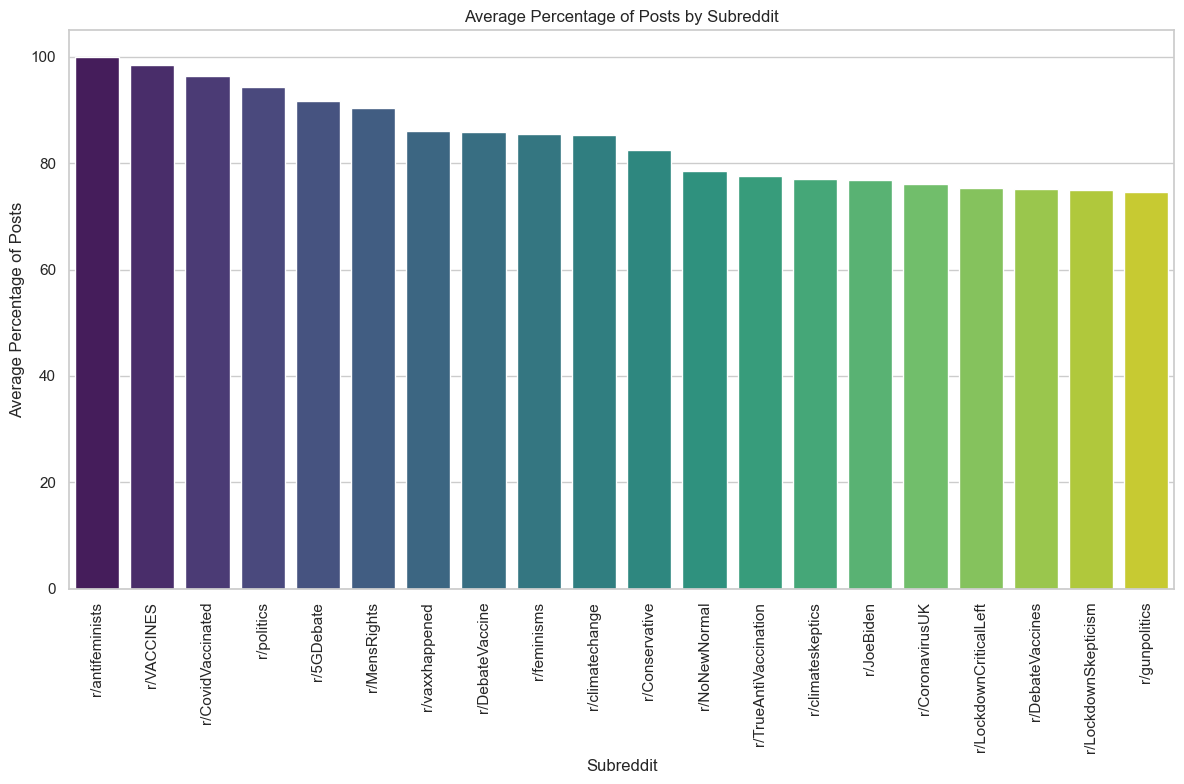

In [32]:
subreddit_averages = most_active_subreddits.groupby('subreddit')['percentage'].mean().sort_values(ascending=False).head(20)

plt.figure(figsize=(12, 8))
sns.barplot(
    x=subreddit_averages.index,
    y=subreddit_averages.values,
    palette="viridis"
)
plt.xlabel('Subreddit')
plt.ylabel('Average Percentage of Posts')
plt.title("Average Percentage of Posts by Subreddit")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [38]:
# Define the percentage bins
bins = list(range(0, 105, 5))  # 0 to 100 with steps of 5
labels = [f'{i}-{i+5}%' for i in bins[:-1]]
most_active_subreddits['percentage_bin'] = pd.cut(most_active_subreddits['percentage'], bins=bins, labels=labels, right=False)
bin_counts = most_active_subreddits['percentage_bin'].value_counts().sort_index()


In [39]:
bin_counts

percentage_bin
0-5%          0
5-10%         0
10-15%        0
15-20%        1
20-25%        1
25-30%        5
30-35%       15
35-40%       39
40-45%       49
45-50%       75
50-55%       76
55-60%       86
60-65%       89
65-70%      116
70-75%      133
75-80%      140
80-85%      158
85-90%      251
90-95%      384
95-100%    1512
Name: count, dtype: int64

C:\Users\petar\AppData\Local\Temp\ipykernel_22756\1197852936.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bin_counts.index, y=bin_counts.values, palette="viridis")


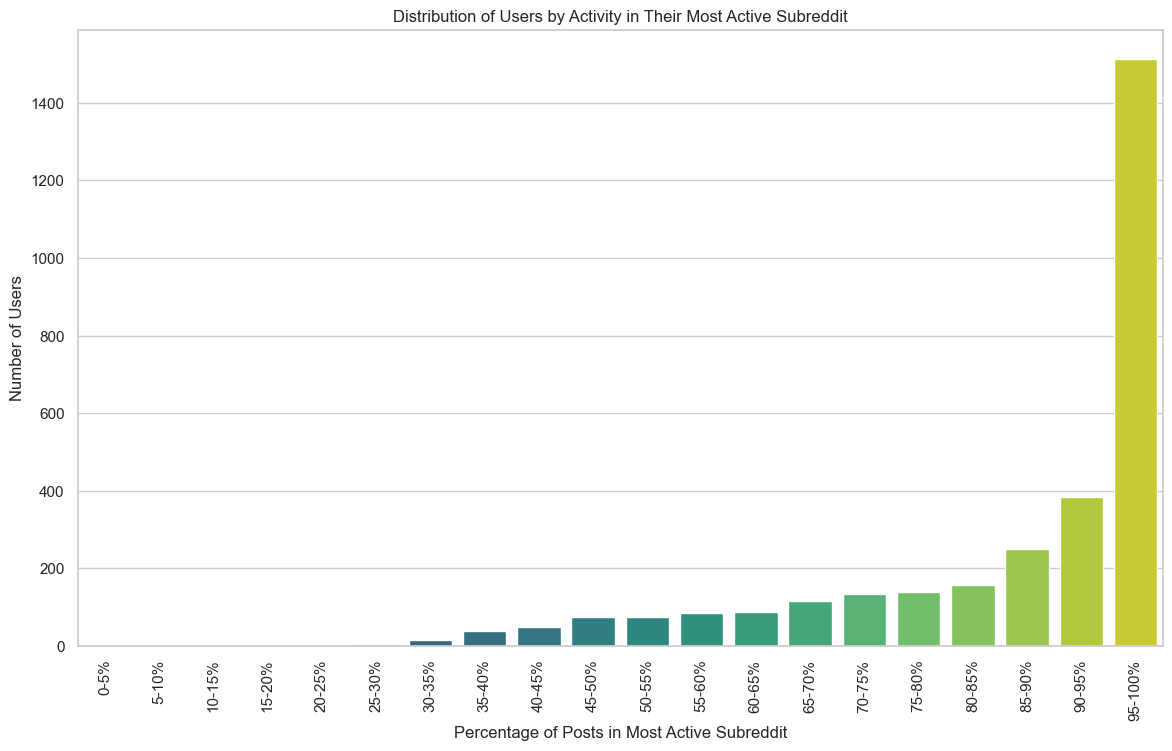

In [40]:
plt.figure(figsize=(14, 8))
sns.barplot(x=bin_counts.index, y=bin_counts.values, palette="viridis")
plt.xticks(rotation=90)
plt.xlabel('Percentage of Posts in Most Active Subreddit')
plt.ylabel('Number of Users')
plt.title('Distribution of Users by Activity in Their Most Active Subreddit')
plt.show()